# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from pathlib import Path

%matplotlib inline

In [9]:
# Load .env enviroment variables
env_path = Path('../../../.env')
load_dotenv(env_path)

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [10]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [11]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [12]:
# Fetch current BTC price
btc_price_data = requests.get(btc_url).json()
btc_price = btc_price_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price_data = requests.get(eth_url).json()
eth_price = eth_price_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $27944.40
The current value of your 5.3 ETH is $9128.08


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [38]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [39]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_api_secret = os.getenv('ALPACA_SECRET_KEY')
                           
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_api_secret, api_version="v2")

In [40]:
# Format current date as ISO format
today = pd.Timestamp("2022-08-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_data = alpaca.get_bars(tickers, timeframe, start=today, end=today).df

# Reorganize the DataFrame
# Separate ticker data
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
ticker_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Preview DataFrame
ticker_data

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-08-05 04:00:00+00:00  102.81  102.83  102.52  102.71  4847064   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2022-08-05 04:00:00+00:00       16418  102.711038  409.68  414.15  409.6   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-08-05 04:00:00+00:00  413.47  56751151      455450  412.292366

In [41]:
# Pick AGG and SPY close prices
agg_close_price = ticker_data['AGG']['close'][0]
spy_close_price = ticker_data['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.71
Current SPY closing price: $413.47


In [42]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20673.50
The current value of your 200 AGG shares is $20542.00


### Savings Health Analysis

In [50]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings_data = [my_btc_value + my_eth_value, my_spy_value + my_agg_value]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=['crypto', 'stock/bond'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,37072.484
stock/bond,41215.500


<AxesSubplot:ylabel='amount'>

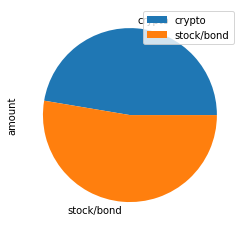

In [53]:
# Plot savings pie chart
df_savings.plot.pie(y="amount")

In [58]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_data[0] + savings_data[1]

# Validate saving health
if(total_savings >= emergency_fund):
    print("Congratulations! You have enough money in your emergency fund.")
else:
    print("There's not enough savings in your emergency fund. Keep on saving!")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [60]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-08-05', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-08-05', tz='America/New_York').isoformat()

In [61]:
# Get 5 years' worth of historical data for SPY and AGG
mc_ticker_data = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df


# Reorganize the DataFrame
# Separate ticker data
AGG_MC = mc_ticker_data[mc_ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY_MC = mc_ticker_data[mc_ticker_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
mc_ticker_data = pd.concat([AGG_MC, SPY_MC], axis=1, keys=["AGG", "SPY"])

# Display sample data
mc_ticker_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-08-07 04:00:00+00:00  109.69  109.72  109.6066  109.67  2359826   
2017-08-08 04:00:00+00:00  109.67  109.69  109.5000  109.57  2570876   
2017-08-09 04:00:00+00:00  109.87  109.87  109.6600  109.67  2308932   
2017-08-10 04:00:00+00:00  109.70  109.85  109.6700  109.78  2004163   
2017-08-11 04:00:00+00:00  109.75  109.94  109.6800  109.87  1913253   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-08-07 04:00:00+00:00        7755  109.674876  247.50  247.87  247.37   
2017-08-08 04:00:00+00:00       12663  109.577636  247.49  248.91  246.83   
2017-08-09 04:00:00+00:00       11031  109.771749  246.46  247.31  246.06   
2017-08-10 04:00:00+00:00       12437  109.776611  246.30  246.44  243.70   
2017-08-11 04:00:00+00:00       10113  109.860974  244.00  244.80  243.75   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-08-07 04:00:00+00:00  247.87   31995021      100111  247.668698  
2017-08-08 04:00:00+00:00  247.26   61719353      192921  247.739709  
2017-08-09 04:00:00+00:00  247.25   62632619      223650  246.791421  
2017-08-10 04:00:00+00:00  243.76  120418270      424321  245.027847  
2017-08-11 04:00:00+00:00  244.12   74869947      278786  244.222867

In [65]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_SIM = MCSimulation(portfolio_data=mc_ticker_data, weights=[.40, .60], num_simulation=500, num_trading_days=252*30)

In [68]:
# Printing the simulation input data
mc_ticker_data

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2017-08-07 04:00:00+00:00  109.69  109.720  109.6066  109.67  2359826   
2017-08-08 04:00:00+00:00  109.67  109.690  109.5000  109.57  2570876   
2017-08-09 04:00:00+00:00  109.87  109.870  109.6600  109.67  2308932   
2017-08-10 04:00:00+00:00  109.70  109.850  109.6700  109.78  2004163   
2017-08-11 04:00:00+00:00  109.75  109.940  109.6800  109.87  1913253   
...                           ...      ...       ...     ...      ...   
2022-08-01 04:00:00+00:00  103.97  104.305  103.9100  104.23  7485387   
2022-08-02 04:00:00+00:00  104.27  104.345  103.1350  103.16  6866199   
2022-08-03 04:00:00+00:00  103.03  103.640  102.7200  103.62  6254853   
2022-08-04 04:00:00+00:00  103.67  103.890  103.5700  103.87  5198972   
2022-08-05 04:00:00+00:00  102.81  102.830  102.5200  102.71  4847064   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-08-07 04:00:00+00:00        7755  109.674876  247.50  247.87  247.37   
2017-08-08 04:00:00+00:00       12663  109.577636  247.49  248.91  246.83   
2017-08-09 04:00:00+00:00       11031  109.771749  246.46  247.31  246.06   
2017-08-10 04:00:00+00:00       12437  109.776611  246.30  246.44  243.70   
2017-08-11 04:00:00+00:00       10113  109.860974  244.00  244.80  243.75   
...                               ...         ...     ...     ...     ...   
2022-08-01 04:00:00+00:00       31215  104.156518  409.16  413.41  408.40   
2022-08-02 04:00:00+00:00       38447  103.522777  409.03  413.00  406.82   
2022-08-03 04:00:00+00:00       23383  103.276553  410.40  415.68  410.00   
2022-08-04 04:00:00+00:00       17078  103.727981  414.25  415.09  412.44   
2022-08-05 04:00:00+00:00       16418  102.711038  409.68  414.15  409.60   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-08-07 04:00:00+00:00  247.87   31995021      100111  247.668698  
2017-08-08 04:00:00+00:00  247.26   61719353      192921  247.739709  
2017-08-09 04:00:00+00:00  247.25   62632619      223650  246.791421  
2017-08-10 04:00:00+00:00  243.76  120418270      424321  245.027847  
2017-08-11 04:00:00+00:00  244.12   74869947      278786  244.222867  
...                           ...        ...         ...         ...  
2022-08-01 04:00:00+00:00  410.77   69633616      516221  411.079113  
2022-08-02 04:00:00+00:00  408.06   63113622      502751  409.635855  
2022-08-03 04:00:00+00:00  414.45   67573063      463932  413.267159  
2022-08-04 04:00:00+00:00  414.17   45565581      364658  414.080458  
2022-08-05 04:00:00+00:00  413.47   56751151      455450  412.292366  

[1259 rows x 14 columns]

In [69]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_SIM.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/case/Development/UMN-bootcamp/apis-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007136,1.015717,1.008177,0.998488,0.992122,1.000953,0.991466,1.006469,0.987256,0.997344,...,0.997500,1.005056,1.005923,0.998280,0.998911,0.998711,0.997100,1.005115,1.011318,0.993155
2,0.990910,1.039451,1.000727,1.000263,0.985815,1.001522,0.986948,1.004635,0.989371,0.996170,...,0.996227,1.002060,1.006645,0.999882,1.007268,0.998195,1.001481,1.003209,1.018325,1.002468
3,0.992759,1.037930,0.996822,1.003430,0.987507,1.006201,0.996026,1.004815,0.976737,0.982913,...,0.995932,1.004362,0.989612,1.004327,1.001705,0.999618,0.995572,1.004554,1.020883,1.010421
4,0.999795,1.034345,1.003955,1.005543,0.984980,1.010468,0.999559,0.999655,0.978597,0.984843,...,1.001911,1.012914,0.989732,1.017674,1.013467,1.003253,1.001468,0.998184,1.020407,0.998087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.815997,3.887560,1.345577,11.453694,6.615401,14.860088,11.148927,16.212405,8.433582,2.832108,...,8.239612,10.773756,6.270856,6.705920,18.952917,8.929232,1.908984,3.455431,8.291917,6.151799
7557,6.828975,3.934028,1.365528,11.497289,6.534939,14.882039,11.248808,16.346875,8.424524,2.784979,...,8.229037,10.772726,6.308237,6.717295,18.756850,8.990840,1.913171,3.424583,8.332050,6.188515
7558,6.814392,3.946945,1.367333,11.541481,6.511409,14.761111,11.205683,16.176973,8.431400,2.796230,...,8.172109,10.838944,6.281034,6.848803,18.572706,9.059020,1.926872,3.413394,8.360770,6.243223
7559,6.718249,3.971805,1.356209,11.503163,6.554734,14.765013,11.157453,16.395770,8.486528,2.811106,...,8.261339,10.899140,6.331703,6.815372,18.393905,9.193338,1.928852,3.374527,8.308670,6.264356


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

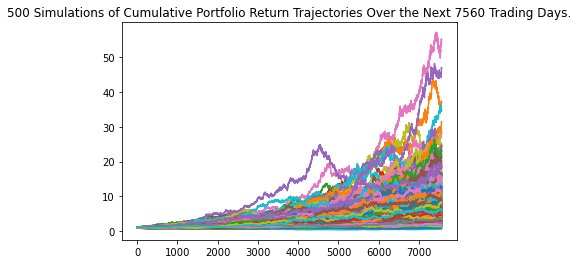

In [71]:
# Plot simulation outcomes
MC_SIM.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

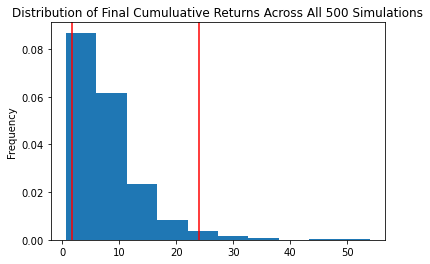

In [72]:
# Plot probability distribution and confidence intervals
MC_SIM.plot_distribution()

### Retirement Analysis

In [73]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_SIM.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              8.015190
std               6.216225
min               0.599408
25%               3.922917
50%               6.392393
75%              10.346855
max              54.023624
95% CI Lower      1.659745
95% CI Upper     24.038489
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [74]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $33194.9 and $480769.78


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [75]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment, 2)
ci_upper = round(tbl[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $49792.35 and $721154.67


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [76]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_SIM_5YR = MCSimulation(portfolio_data=mc_ticker_data, weights=[.40, .60], num_simulation=500, num_trading_days=252*5)

In [77]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_SIM_5YR.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/case/Development/UMN-bootcamp/apis-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004524,1.000102,1.004213,0.990327,0.991982,0.986738,1.001397,1.008938,1.002869,0.994174,...,0.987933,0.996911,0.988434,0.992818,1.005762,1.011935,1.011666,1.008994,1.001964,0.991625
2,0.991886,1.004739,1.002905,0.996274,0.997954,0.984516,0.999351,1.022073,0.995039,0.992487,...,0.990511,0.998670,0.994141,0.989035,1.017221,1.018621,1.001309,1.006739,1.008039,0.991079
3,0.993186,1.002892,1.003424,1.000374,0.990862,0.979173,0.997643,1.014008,1.000986,0.986395,...,0.981000,0.996633,0.997437,0.987377,1.002404,1.014379,1.002925,1.003635,1.010550,0.995220
4,0.981000,1.000782,1.006886,1.006693,0.975523,0.985054,1.006769,1.014009,0.993109,0.992948,...,0.983064,0.999430,0.994352,0.988108,1.013525,1.008518,1.007463,1.000278,1.014874,1.006203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.667602,2.140331,0.928411,1.613502,1.478918,2.636170,1.615078,1.763077,0.848913,2.054156,...,1.179955,1.633175,1.119223,0.819641,1.602429,1.176454,1.383731,1.477233,1.116288,0.936318
1257,1.686146,2.154164,0.908711,1.597288,1.480530,2.631025,1.618976,1.778080,0.852264,2.049638,...,1.172731,1.647633,1.126912,0.825989,1.591414,1.185379,1.383904,1.466088,1.121906,0.949095
1258,1.682200,2.142696,0.915485,1.584519,1.490958,2.629969,1.642312,1.780109,0.847085,2.049376,...,1.175812,1.633414,1.117584,0.835369,1.577311,1.176175,1.389765,1.450326,1.115787,0.949586
1259,1.666590,2.131237,0.897686,1.614757,1.477540,2.630171,1.637232,1.794313,0.862551,2.055834,...,1.178255,1.638597,1.128383,0.836868,1.596432,1.169981,1.390009,1.459416,1.104844,0.957336


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

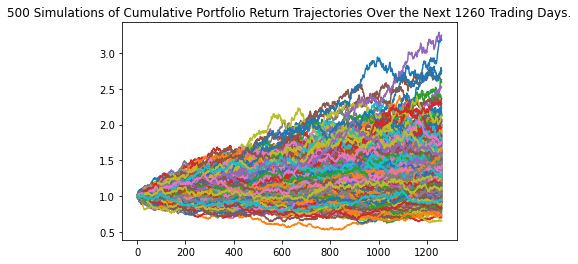

In [78]:
# Plot simulation outcomes
MC_SIM_5YR.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

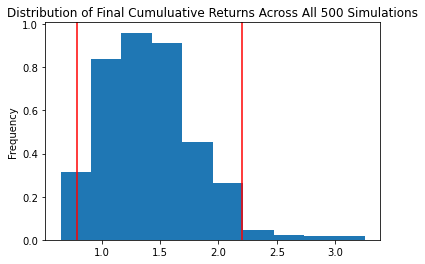

In [79]:
# Plot probability distribution and confidence intervals
MC_SIM_5YR.plot_distribution()

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_5YR = MC_SIM_5YR.summarize_cumulative_return()

# Print summary statistics
print(tbl_5YR)

count           500.000000
mean              1.399426
std               0.395821
min               0.649375
25%               1.088854
50%               1.365231
75%               1.631641
max               3.253223
95% CI Lower      0.792328
95% CI Upper      2.206082
Name: 1260, dtype: float64


In [82]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl_5YR[8]*initial_investment, 2)
ci_upper_five = round(tbl_5YR[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $47539.7 and $132364.93


### Ten Years Retirement Option

In [83]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_SIM_10YR = MCSimulation(portfolio_data=mc_ticker_data, weights=[.40, .60], num_simulation=500, num_trading_days=252*10)

In [84]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_SIM_10YR.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/case/Development/UMN-bootcamp/apis-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999106,1.000515,1.011273,1.000194,1.007129,0.992605,1.007499,0.994586,1.013801,1.002007,...,1.001868,1.013109,1.003311,1.010767,0.998434,0.991950,1.005945,0.996392,0.995520,0.996935
2,1.001258,0.994608,1.018089,1.010888,1.003289,0.982120,0.987050,0.991849,1.010124,0.995141,...,1.008185,1.016702,0.999806,1.007376,1.008454,1.003859,0.988278,1.006594,1.000582,0.991327
3,1.006614,0.995012,1.021344,1.008922,1.000518,0.989907,0.998614,0.986495,1.004254,0.993995,...,0.997926,1.039284,0.994585,1.003151,0.996865,1.005306,0.986111,1.011959,1.005806,0.991716
4,1.016268,1.000794,1.038111,1.018909,0.989962,0.990138,0.987067,0.987835,0.992928,0.992368,...,1.006146,1.036330,0.997495,0.999091,0.983060,1.004223,0.980435,1.004613,0.992215,0.999681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.702186,1.834398,2.103434,0.938948,1.257890,1.202951,2.098182,0.680496,2.737161,1.085775,...,3.181861,1.888409,1.803675,2.918394,1.973667,1.535381,2.241347,1.343602,2.120443,3.632034
2517,0.703668,1.824674,2.110701,0.935223,1.261717,1.200873,2.094953,0.678637,2.783982,1.082785,...,3.167828,1.892347,1.816373,2.910346,1.975682,1.514170,2.242506,1.348101,2.156414,3.666344
2518,0.700452,1.841324,2.111596,0.934555,1.278767,1.205180,2.101773,0.681028,2.835224,1.076105,...,3.229622,1.881849,1.804358,2.905820,1.993511,1.515033,2.230879,1.336517,2.149515,3.626288
2519,0.691568,1.845329,2.108565,0.941918,1.282501,1.205401,2.152286,0.682250,2.846975,1.084770,...,3.264547,1.880684,1.794930,2.900005,2.011244,1.498317,2.233724,1.351824,2.148178,3.662434


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

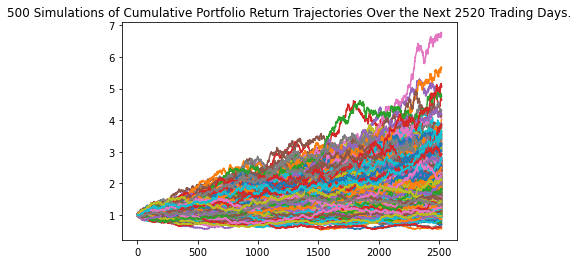

In [85]:
# Plot simulation outcomes
MC_SIM_10YR.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

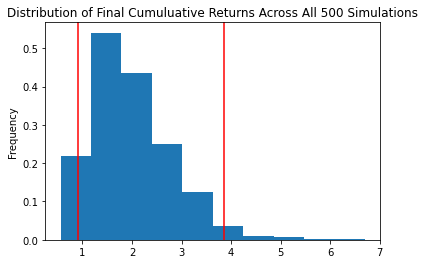

In [86]:
# Plot probability distribution and confidence intervals
MC_SIM_10YR.plot_distribution()

In [88]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl_10YR = MC_SIM_10YR.summarize_cumulative_return()

# Print summary statistics
print(tbl_10YR)

count           500.000000
mean              1.983013
std               0.823448
min               0.557760
25%               1.386832
50%               1.818739
75%               2.432148
max               6.700414
95% CI Lower      0.909803
95% CI Upper      3.848388
Name: 2520, dtype: float64


In [89]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl_10YR[8]*initial_investment, 2)
ci_upper_ten = round(tbl_10YR[9]*initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $54588.16 and $230903.29
